In [1]:
from coffea.util import load
import numpy as np
import pandas as pd
import glob, os, json, argparse
years = ['2016preVFP']#, '2017', '2016postVFP','2018']
var_dict = {}
for year in years:
    print(f'Processing {year}')
    for subsample in ['signal']:
    #for subsample in ['signal','diboson','tt','st','dy','wjets','higgs','ewk']: #'data',
        result = load(f"../results/{year}/makeDF/output_testv9_{subsample}.coffea")
        if isinstance(result,tuple):
            result = result[0]
        for varName in result:
            if varName in var_dict:
                var_dict[varName] = np.append(var_dict[varName],result[varName].value)
            else:
                var_dict[varName] = result[varName].value
df = pd.DataFrame(var_dict)

Processing 2016preVFP


In [2]:
df = df[(df['e_m_Mass_reso']!=0)]

[ 0.50567609  1.03446453  1.31908255  1.59665188  1.97636984 21.57709068]


<AxesSubplot:xlabel='$m_{e \\mu}$', ylabel='A.U.'>

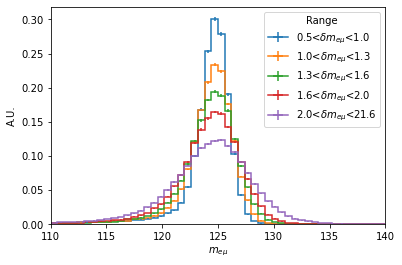

In [8]:
import coffea.hist as hist
from statsmodels.stats.weightstats import DescrStatsW
histo = hist.Hist("A.U.", hist.Bin("e_m_Mass", "$m_{e \mu}$", 50, 110, 140), hist.Cat("Range", "Range"))
wq = DescrStatsW(data=df['e_m_Mass_reso'], weights=df['weight'])
h_quan = hist.Hist('A.U.', hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 25, 110, 135), hist.Cat("sample", "sample"))
reso = wq.quantile(probs=np.array([0, 0.20, 0.40, 0.60, 0.80, 1]), return_pandas=False)
print(reso)
for i in range(len(reso)-1):
    histo.fill(e_m_Mass=df[(df['e_m_Mass_reso']>reso[i]) & (df['e_m_Mass_reso']<reso[i+1])]['e_m_Mass'].to_numpy(), weight=df[(df['e_m_Mass_reso']>reso[i]) & (df['e_m_Mass_reso']<reso[i+1])]['weight'].to_numpy(), Range=f'{reso[i]:.1f}<$'+'\delta m_{e\mu}$'+f'<{reso[i+1]:.1f}')
hist.plot1d(histo, density=True)

In [103]:
df0_ogweight = df[0]['weight'].sum()/ (df[0]['weight']/df[0]['e_m_Mass_reso']).sum()
df1_ogweight = df[1]['weight'].sum()/ (df[1]['weight']/df[1]['e_m_Mass_reso']).sum()
df2_ogweight = df[2]['weight'].sum()/ (df[2]['weight']/df[2]['e_m_Mass_reso']).sum()
print(df0_ogweight, df1_ogweight, df2_ogweight)

1.9958657944010092 0.03606189224251066 0.0030829913167666886


<AxesSubplot:xlabel='$m_{e \\mu}$', ylabel='A.U.'>

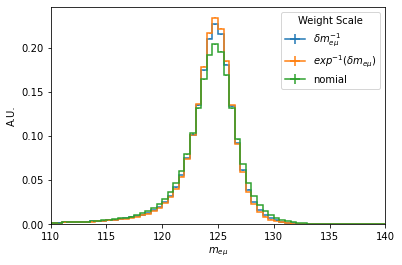

In [15]:
import coffea.hist as hist
histo = hist.Hist("A.U.", hist.Bin("e_m_Mass", "$m_{e \mu}$", 60, 110, 140), hist.Cat("Scale", "Weight Scale"))

histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='nomial', weight=df[0]['weight'].to_numpy())
histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='nomial', weight=df[1]['weight'].to_numpy())
histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='nomial', weight=df[2]['weight'].to_numpy())

#histo.fill(e_m_Mass=(df[0]['e_m_Mass'].to_numpy()-df[0]['e_m_Mass'].mean())/df[0]['e_m_Mass'].std()+df[0]['e_m_Mass'].mean(), Scale='smear', weight=df[0]['weight'])
#histo.fill(e_m_Mass=(df[1]['e_m_Mass'].to_numpy()-df[1]['e_m_Mass'].mean())/df[1]['e_m_Mass'].std()+df[1]['e_m_Mass'].mean(), Scale='smear', weight=df[1]['weight'])#
#histo.fill(e_m_Mass=(df[2]['e_m_Mass'].to_numpy()-df[2]['e_m_Mass'].mean())/df[2]['e_m_Mass'].std()+df[2]['e_m_Mass'].mean(), Scale='smear', weight=df[2]['weight'])

#histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-2}_{e\mu}$', weight=(df[0]['weight']/df[0]['e_m_Mass_reso'].pow(2)).to_numpy())
#histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-2}_{e\mu}$', weight=(df[1]['weight']/df[1]['e_m_Mass_reso'].pow(2)).to_numpy())
#histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-2}_{e\mu}$', weight=(df[2]['weight']/df[2]['e_m_Mass_reso'].pow(2)).to_numpy())

#histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-1}_{e\mu} \cdot m_{e\mu}$', weight=(df[0]['weight']*df[0]['e_m_Mass']/df[0]['e_m_Mass_reso']).to_numpy())
#histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-1}_{e\mu} \cdot m_{e\mu}$', weight=(df[1]['weight']*df[1]['e_m_Mass']/df[1]['e_m_Mass_reso']).to_numpy())
#histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-1}_{e\mu} \cdot m_{e\mu}$', weight=(df[2]['weight']*df[2]['e_m_Mass']/df[2]['e_m_Mass_reso']).to_numpy())

histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-1}_{e\mu}$', weight=(df[0]['weight']/df[0]['e_m_Mass_reso']).to_numpy())
histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-1}_{e\mu}$', weight=(df[1]['weight']/df[1]['e_m_Mass_reso']).to_numpy())
histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$\delta m^{-1}_{e\mu}$', weight=(df[2]['weight']/df[2]['e_m_Mass_reso']).to_numpy())

histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$exp^{-1}(\delta m_{e\mu})$', weight=(df[0]['weight']/np.exp(df[0]['e_m_Mass_reso'])).to_numpy())
histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$exp^{-1}(\delta m_{e\mu})$', weight=(df[1]['weight']/np.exp(df[1]['e_m_Mass_reso'])).to_numpy())
histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$exp^{-1}(\delta m_{e\mu})$', weight=(df[2]['weight']/np.exp(df[2]['e_m_Mass_reso'])).to_numpy())

#histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$exp^{-1}(\delta m_{e\mu})$', weight=(df[0]['weight']/np.exp(df[0]['e_m_Mass_ereso'])).to_numpy())
#histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$exp^{-1}(\delta m_{e\mu})$', weight=(df[1]['weight']/np.exp(df[1]['e_m_Mass_ereso'])).to_numpy())
#histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$exp^{-1}(\delta m_{e\mu})$', weight=(df[2]['weight']/np.exp(df[2]['e_m_Mass_ereso'])).to_numpy())


#histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$\delta exp^{-1}(m_{e\mu}-2)$', weight=(df[0]['weight']/np.exp(df[0]['e_m_Mass_reso']**2)).to_numpy())
#histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$\delta exp^{-1}(m_{e\mu}-2)$', weight=(df[1]['weight']/np.exp(df[1]['e_m_Mass_reso']**2)).to_numpy())
#histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$\delta exp^{-1}(m_{e\mu}-2)$', weight=(df[2]['weight']/np.exp(df[2]['e_m_Mass_reso']**2)).to_numpy())
#histo.fill(e_m_Mass=df[0]['e_m_Mass'].to_numpy(), Scale='$\delta exp^{-1}(m_{e\mu}^{2})$', weight=(df[0]['weight']/np.exp(np.exp(df[0]['e_m_Mass_reso']))).to_numpy())
#histo.fill(e_m_Mass=df[1]['e_m_Mass'].to_numpy(), Scale='$\delta exp^{-1}(m_{e\mu}^{2})$', weight=(df[1]['weight']/np.exp(np.exp(df[1]['e_m_Mass_reso']))).to_numpy())
#histo.fill(e_m_Mass=df[2]['e_m_Mass'].to_numpy(), Scale='$\delta exp^{-1}(m_{e\mu}^{2})$', weight=(df[2]['weight']/np.exp(np.exp(df[2]['e_m_Mass_reso']))).to_numpy())
hist.plot1d(histo, density=True)

In [208]:
(df[1]['m_deltapT']==0).sum()

0

<AxesSubplot:xlabel='$\\delta m_{e\\mu}$', ylabel='Events'>

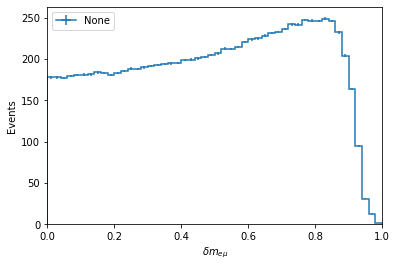

In [4]:
import coffea.hist as hist
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 50, 0, 1))
histo.fill(e_m_Mass_reso=df[0]['lepCos'].to_numpy(), weight=df[0]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[1]['lepCos'].to_numpy(), weight=df[1]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[2]['lepCos'].to_numpy(), weight=df[2]['weight'].to_numpy())
hist.plot1d(histo)

<AxesSubplot:xlabel='$\\delta m_{e\\mu}$', ylabel='Events'>

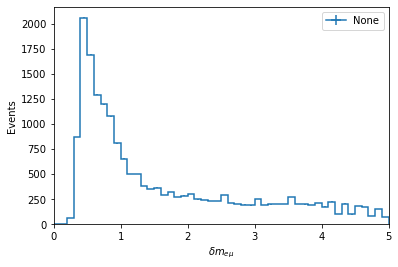

In [5]:
import coffea.hist as hist
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 50, 0, 5))
histo.fill(e_m_Mass_reso=df[0]['e_deltaE'].to_numpy(), weight=df[0]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[1]['e_deltaE'].to_numpy(), weight=df[1]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[2]['e_deltaE'].to_numpy(), weight=df[2]['weight'].to_numpy())
hist.plot1d(histo)

<AxesSubplot:xlabel='$\\delta m_{e\\mu}$', ylabel='Events'>

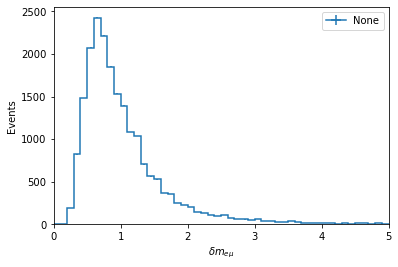

In [6]:
import coffea.hist as hist
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 50, 0, 5))
histo.fill(e_m_Mass_reso=df[0]['m_deltapT'].to_numpy(), weight=df[0]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[1]['m_deltapT'].to_numpy(), weight=df[1]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[2]['m_deltapT'].to_numpy(), weight=df[2]['weight'].to_numpy())
hist.plot1d(histo)

<AxesSubplot:xlabel='$\\delta m_{e\\mu}$', ylabel='Events'>

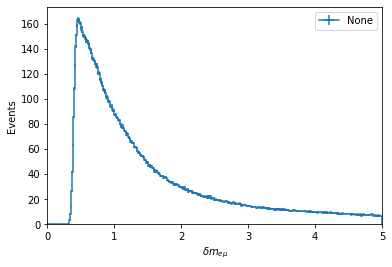

In [14]:
import coffea.hist as hist
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 500, 0, 5))
histo.fill(e_m_Mass_reso=(df[0]['e_m_Mass_reso']/(1-df[0]['lepCos'])).to_numpy(), weight=df[0]['weight'])
histo.fill(e_m_Mass_reso=(df[1]['e_m_Mass_reso']/(1-df[1]['lepCos'])).to_numpy(), weight=df[1]['weight'])
histo.fill(e_m_Mass_reso=(df[2]['e_m_Mass_reso']/(1-df[2]['lepCos'])).to_numpy(), weight=df[2]['weight'])
hist.plot1d(histo)

<AxesSubplot:xlabel='$\\delta m_{e\\mu}$', ylabel='Events'>

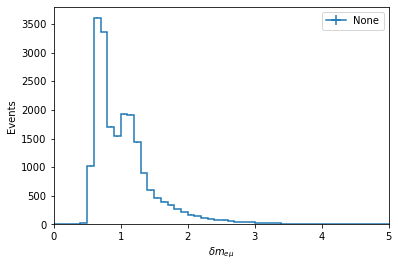

In [8]:
import coffea.hist as hist
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 50, 0, 5))
histo.fill(e_m_Mass_reso=df[0]['e_m_Mass_mreso'].to_numpy(), weight=df[0]['weight'])
histo.fill(e_m_Mass_reso=df[1]['e_m_Mass_mreso'].to_numpy(), weight=df[1]['weight'])
histo.fill(e_m_Mass_reso=df[2]['e_m_Mass_mreso'].to_numpy(), weight=df[2]['weight'])
hist.plot1d(histo)

<AxesSubplot:xlabel='$\\delta m_{e\\mu}$', ylabel='Events'>

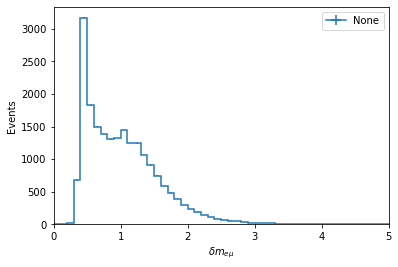

In [9]:
import coffea.hist as hist
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 50, 0, 5))
histo.fill(e_m_Mass_reso=df[0]['e_m_Mass_ereso'].to_numpy(), weight=df[0]['weight'])
histo.fill(e_m_Mass_reso=df[1]['e_m_Mass_ereso'].to_numpy(), weight=df[1]['weight'])
histo.fill(e_m_Mass_reso=df[2]['e_m_Mass_ereso'].to_numpy(), weight=df[2]['weight'])
hist.plot1d(histo)

In [52]:
df[2][df[2]['e_m_Mass_reso']<0]

,opp_charge,is2016preVFP,is2016postVFP,is2017,is2018,sample,label,weight,njets,e_m_Mass,...,DeltaR_j2_em,DeltaEta_j1_j2,DeltaR_j1_j2,Zeppenfeld,Zeppenfeld_DeltaEta,cen,Rpt,pt_cen,pt_cen_Deltapt,Ht_had


In [54]:
abs(df[0]['e_m_Mass_reso']-df[0]['e_m_Mass_reso'].mean())

1325       0.109386
1326       0.171248
1327       0.282109
1328       0.438480
1329       1.318709
            ...    
405692     1.057756
405693    11.019568
405694     0.608924
405695     1.457592
405696     0.951335
Name: e_m_Mass_reso, Length: 78585, dtype: float64

In [ ]:
histo = hist.Hist("Events", hist.Bin("e_m_Mass_reso", "$\delta m_{e\mu}$", 50, 0, 20))
histo.fill(e_m_Mass_reso=df[0]['e_m_Mass_reso'].to_numpy(), weight=df[0]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[1]['e_m_Mass_reso'].to_numpy(), weight=df[1]['weight'].to_numpy())
histo.fill(e_m_Mass_reso=df[2]['e_m_Mass_reso'].to_numpy(), weight=df[2]['weight'].to_numpy())
hist.plot1d(histo)